In [2]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt

#### 가중치의 초깃값
1. Overfitting을 억제하여 범용 성능을 높이는 방법의 하나인 weight decay라는 방법이 존재한다. 
2. 이는 가중치의 매개변수의 값이 작아지도록 학습하여 overfitting이 발생하지 않도록 하는 것이다.
    - 그러나 가중치를 0에서 모두 균일하게 시작해 버리면 역전파에서 뉴런에 모두 같은 가중치로 갱신이 된다는 것을 의미한다.
    - 따라서 가중치는 무조건 균일하지 않게 무작위로 초깃값을 설정해 주어야 한다.
3. 때문에 가중치의 초깃값에 따라서 은닉층의 활성화값들이 어떻게 변화하는지 알아보고자 한다.    

In [4]:
def sigmoid(x):
    return 1/(1+np.exp(-x))

x = np.random.randn(1000, 100)

In [6]:
x.shape

(1000, 100)

In [7]:
node_num, hidden_layer_size, activations = 100, 5, {}

- 100개의 노드를 가지는 5개의 은닉층의 활성화 함수에 대입한 결괏값을 activations라는 데이터에 저장하고자 한다.
    - 우선은 가중치를 그냥 정규분포의 표준편차의 값을 1로 설정하였기 떄문에 기울시 손실이 발생하겠지만
    - 가중치의 표준편차를 0.01로 바꾸어 주면 기울기 소실 문제는 해결이 되지만 활성화 값들이 치우쳤다는 단점이 존재 한다.

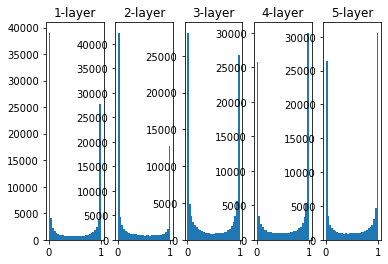

In [9]:
for i in range(hidden_layer_size):
    if i != 0:
        x = activations[i-1]
    w = np.random.randn(node_num, node_num) * 1
    a = np.dot(x,w)
    z = sigmoid(a)
    activations[i] = z

for i, a in activations.items():
    plt.subplot(1, len(activations), i+1)
    plt.title(str(i+1) + "-layer")
    plt.hist(a.flatten(), 30, range = (0,1))
plt.show()    

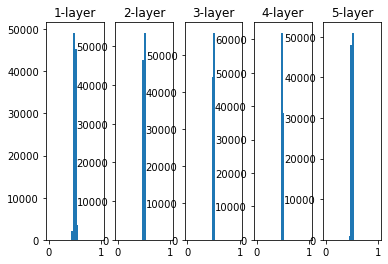

In [10]:
for i in range(hidden_layer_size):
    if i != 0:
        x = activations[i-1]
    w = np.random.randn(node_num, node_num) * 0.01
    a = np.dot(x,w)
    z = sigmoid(a)
    activations[i] = z

for i, a in activations.items():
    plt.subplot(1, len(activations), i+1)
    plt.title(str(i+1) + "-layer")
    plt.hist(a.flatten(), 30, range = (0,1))
plt.show()

1. 이렇게 활성화 값들이 치우치게 되면 다수의 뉴런이 거의 같은 값을 출력하고 있게 되어서 **뉴런을 여러개 둔 것이 의미가 없**어진다.
2. 때문에 뉴런 100개가 거의 일치하는 값을 출력하고 있어 뉴런이 1개있는 것과 다를 바가 거의 없어진다.
3. 떄문에 Xaviar 초깃값을 가중치 초깃값으로 설정해 보고자 한다.
    - Xaviar 초깃값은 **초깃값의 표준편차가, 만약 앞 계층의 노드가 n개라면 n의 제곱근의 역수를 표준편차로 갖는 분포를 사용하도록 한다.

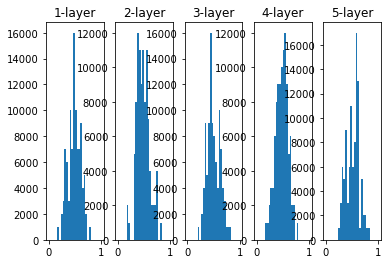

In [11]:
for i in range(hidden_layer_size):
    if i != 0:
        x = activations[i-1]
    w = np.random.randn(node_num, node_num) / np.sqrt(node_num)
    a = np.dot(x,w)
    z = sigmoid(a)
    activations[i] = z

for i, a in activations.items():
    plt.subplot(1, len(activations), i+1)
    plt.title(str(i+1) + "-layer")
    plt.hist(a.flatten(), 30, range = (0,1))
plt.show()

- 그러나 Xaviar초깃값을 사용하는 것은 활성화 함수가 선형임을 이용하고 사용하는 결과이다. 예를 들면 Sigmoid나 Tanh같은 함수가 좌우 대칭이기 떄문에 중앙 부분이 선형인 함수로 볼 수 있다.
- 반면 ReLU를 사용할 때에는 ReLU에 특화된 초깃값을 사용하라고 한다. 이 초깃값을 He 초깃값이라고 이름 짓는다.
**He 초깃값**
1. 앞 계층의 노드가 n일때 2/n의 제곱근을 표준편차로 갖는 분포를 사용한다.

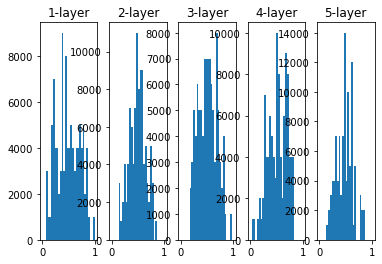

In [13]:
for i in range(hidden_layer_size):
    if i != 0:
        x = activations[i-1]
    w = np.random.randn(node_num, node_num) * np.sqrt(2/node_num)
    a = np.dot(x,w)
    z = sigmoid(a)
    activations[i] = z

for i, a in activations.items():
    plt.subplot(1, len(activations), i+1)
    plt.title(str(i+1) + "-layer")
    plt.hist(a.flatten(), 30, range = (0,1))
plt.show()

**결과적으로 ReLU activation function을 사용할 때에는 He 초기값을,  
  Sigmoid나 Tanh와 같이 S자 모양의 곡선을 사용할 때는 Xavier 초깃값을 사용한다.**